# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 5,
    "NVDA": 8,
    "GOOGL": 6,
    "JPM": 7,
    "UNH": 4,
    "KO": 12,
    "PEP": 5,
    "BMW.DE": -3,     # short
    "NESN.SW": 0.2,   # fractional
    "NOVN.SW": 1.5,
    "ASML.AS": 2
})

# Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd.get_raw_prices(tickers, start="2022-01-01")

# Convert prices to base currency (e.g. CHF)
prices_converted = dd.convert_to_base(prices, base="CHF")

# Create portfolio with monetary positions
position_data = dd.create_portfolio(prices_converted, shares)

# Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.summary_statistics(position_data)

# Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFEUR=X, CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 10426.11

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date

In [3]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [4]:
position_data.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1629.203803,1405.115197,-217.544636,789.596675,938.395706,588.583206,1482.132941,23.019711,97.372501,219.371754,717.262177,1747.324329
2022-01-04,1619.735317,1365.095111,-224.493531,791.852676,980.756864,602.579522,1466.869852,23.069591,97.542194,214.806081,723.304233,1719.635911
2022-01-05,1573.010908,1338.897702,-228.465041,753.781242,960.604045,606.174158,1407.303364,22.446088,98.305859,201.973989,724.092283,1711.437214
2022-01-06,1548.743933,1319.233826,-229.300912,754.601481,972.059621,603.759874,1397.980983,22.396207,98.911938,206.439367,725.191806,1643.512411
2022-01-07,1557.050987,1335.918440,-228.484083,753.880546,985.982170,604.994955,1404.807409,22.171745,99.069523,200.491147,729.283049,1611.858596


In [5]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data=position_data,
                                 confidence_level=confidence_level,
                                 holding_period=holding_period)

In [6]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2022-01-04,279.942368,422.116970,142.174602
2022-01-05,272.467317,411.738874,139.271557
2022-01-06,269.492282,406.776795,137.284513
2022-01-07,269.908956,407.153145,137.244189
2022-01-10,267.547872,402.967745,135.419872


### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [8]:
marginal_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.036749,0.032925,0.011825,0.037053,0.025263,0.013669,0.035146,0.004216,0.004088,0.055328,0.014155,0.024191
2022-01-05,0.036654,0.032852,0.011777,0.036855,0.025276,0.013774,0.034999,0.004265,0.004162,0.054979,0.014269,0.024488
2022-01-06,0.036720,0.032901,0.011795,0.036975,0.025376,0.013771,0.035089,0.004255,0.004139,0.055218,0.014264,0.024179
2022-01-07,0.036762,0.033079,0.011872,0.037001,0.025422,0.013760,0.035119,0.004264,0.004138,0.055260,0.014247,0.023945
2022-01-10,0.036835,0.032325,0.011631,0.037072,0.025479,0.013863,0.035161,0.004235,0.004121,0.055077,0.014375,0.024267


### Incremental, Component and Relative Component VaR

In [9]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [10]:
component_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,59.523923,44.946092,-2.654591,29.340584,24.776563,8.236668,51.554874,0.097273,0.398785,11.884792,10.238344,41.599061
2022-01-05,57.657740,43.985738,-2.690657,27.780956,24.280659,8.349233,49.253591,0.095726,0.409160,11.104235,10.331809,41.909127
2022-01-06,56.869689,43.403520,-2.704586,27.901291,24.666815,8.314576,49.054008,0.095286,0.409399,11.399088,10.344047,39.739149
2022-01-07,57.240829,44.191488,-2.712664,27.893981,25.065559,8.325017,49.334849,0.094543,0.409991,11.079050,10.389739,38.596573
2022-01-10,57.201730,40.514472,-2.708562,28.206654,25.076014,8.377627,49.292899,0.091957,0.411576,11.073644,10.459799,39.550060


In [11]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [12]:
rcvar_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.212629,0.160555,-0.009483,0.104809,0.088506,0.029423,0.184162,0.000347,0.001425,0.042454,0.036573,0.148599
2022-01-05,0.211613,0.161435,-0.009875,0.101961,0.089114,0.030643,0.180769,0.000351,0.001502,0.040754,0.037919,0.153813
2022-01-06,0.211025,0.161057,-0.010036,0.103533,0.091531,0.030853,0.182024,0.000354,0.001519,0.042298,0.038383,0.147459
2022-01-07,0.212075,0.163727,-0.010050,0.103346,0.092867,0.030844,0.182783,0.000350,0.001519,0.041047,0.038493,0.142998
2022-01-10,0.213800,0.151429,-0.010124,0.105427,0.093725,0.031313,0.184240,0.000344,0.001538,0.041389,0.039095,0.147824


In [13]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [14]:
ivar_series.head()

Date
2022-01-04    329.252458
2022-01-05    328.522023
2022-01-06    329.005515
2022-01-07    330.794805
2022-01-10    323.252717
dtype: float64

## ES Test

In [15]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = pv.marginal_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [16]:
marginal_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.042102,0.037721,0.013547,0.042450,0.028943,0.015660,0.040266,0.004831,0.004684,0.063387,0.016217,0.027714
2022-01-05,0.041994,0.037638,0.013493,0.042224,0.028958,0.015780,0.040097,0.004886,0.004768,0.062987,0.016347,0.028055
2022-01-06,0.042069,0.037693,0.013513,0.042361,0.029072,0.015777,0.040200,0.004874,0.004742,0.063261,0.016342,0.027701
2022-01-07,0.042117,0.037898,0.013602,0.042390,0.029125,0.015765,0.040234,0.004885,0.004741,0.063309,0.016322,0.027433
2022-01-10,0.042201,0.037034,0.013326,0.042473,0.029190,0.015882,0.040282,0.004851,0.004721,0.063100,0.016469,0.027801


In [17]:
# Compute and display Component VaR (styled table)
component_es_df = pv.component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [18]:
component_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,68.194447,51.493143,-3.041271,33.614466,28.385629,9.436458,59.064590,0.111442,0.456874,13.615984,11.729708,47.658569
2022-01-05,66.056427,50.392900,-3.082590,31.827656,27.817489,9.565420,56.428092,0.109670,0.468760,12.721728,11.836787,48.013799
2022-01-06,65.153585,49.725873,-3.098548,31.965519,28.259895,9.525715,56.199436,0.109165,0.469034,13.059531,11.850808,45.527733
2022-01-07,65.578787,50.628620,-3.107803,31.957144,28.716722,9.537676,56.521186,0.108315,0.469712,12.692875,11.903155,44.218725
2022-01-10,65.533993,46.415993,-3.103103,32.315363,28.728700,9.597951,56.473126,0.105352,0.471528,12.686682,11.983421,45.311101


In [19]:
res_df = pv.relative_component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [20]:
res_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.212629,0.160555,-0.009483,0.104809,0.088506,0.029423,0.184162,0.000347,0.001425,0.042454,0.036573,0.148599
2022-01-05,0.211613,0.161435,-0.009875,0.101961,0.089114,0.030643,0.180769,0.000351,0.001502,0.040754,0.037919,0.153813
2022-01-06,0.211025,0.161057,-0.010036,0.103533,0.091531,0.030853,0.182024,0.000354,0.001519,0.042298,0.038383,0.147459
2022-01-07,0.212075,0.163727,-0.010050,0.103346,0.092867,0.030844,0.182783,0.000350,0.001519,0.041047,0.038493,0.142998
2022-01-10,0.213800,0.151429,-0.010124,0.105427,0.093725,0.031313,0.184240,0.000344,0.001538,0.041389,0.039095,0.147824


In [21]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0] 

# Compute and display Incremental VaR
ies_series = pv.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [22]:
ies_series.head()

Date
2022-01-04    377.212860
2022-01-05    376.376026
2022-01-06    376.929946
2022-01-07    378.979871
2022-01-10    370.339168
dtype: float64

### Visualizations


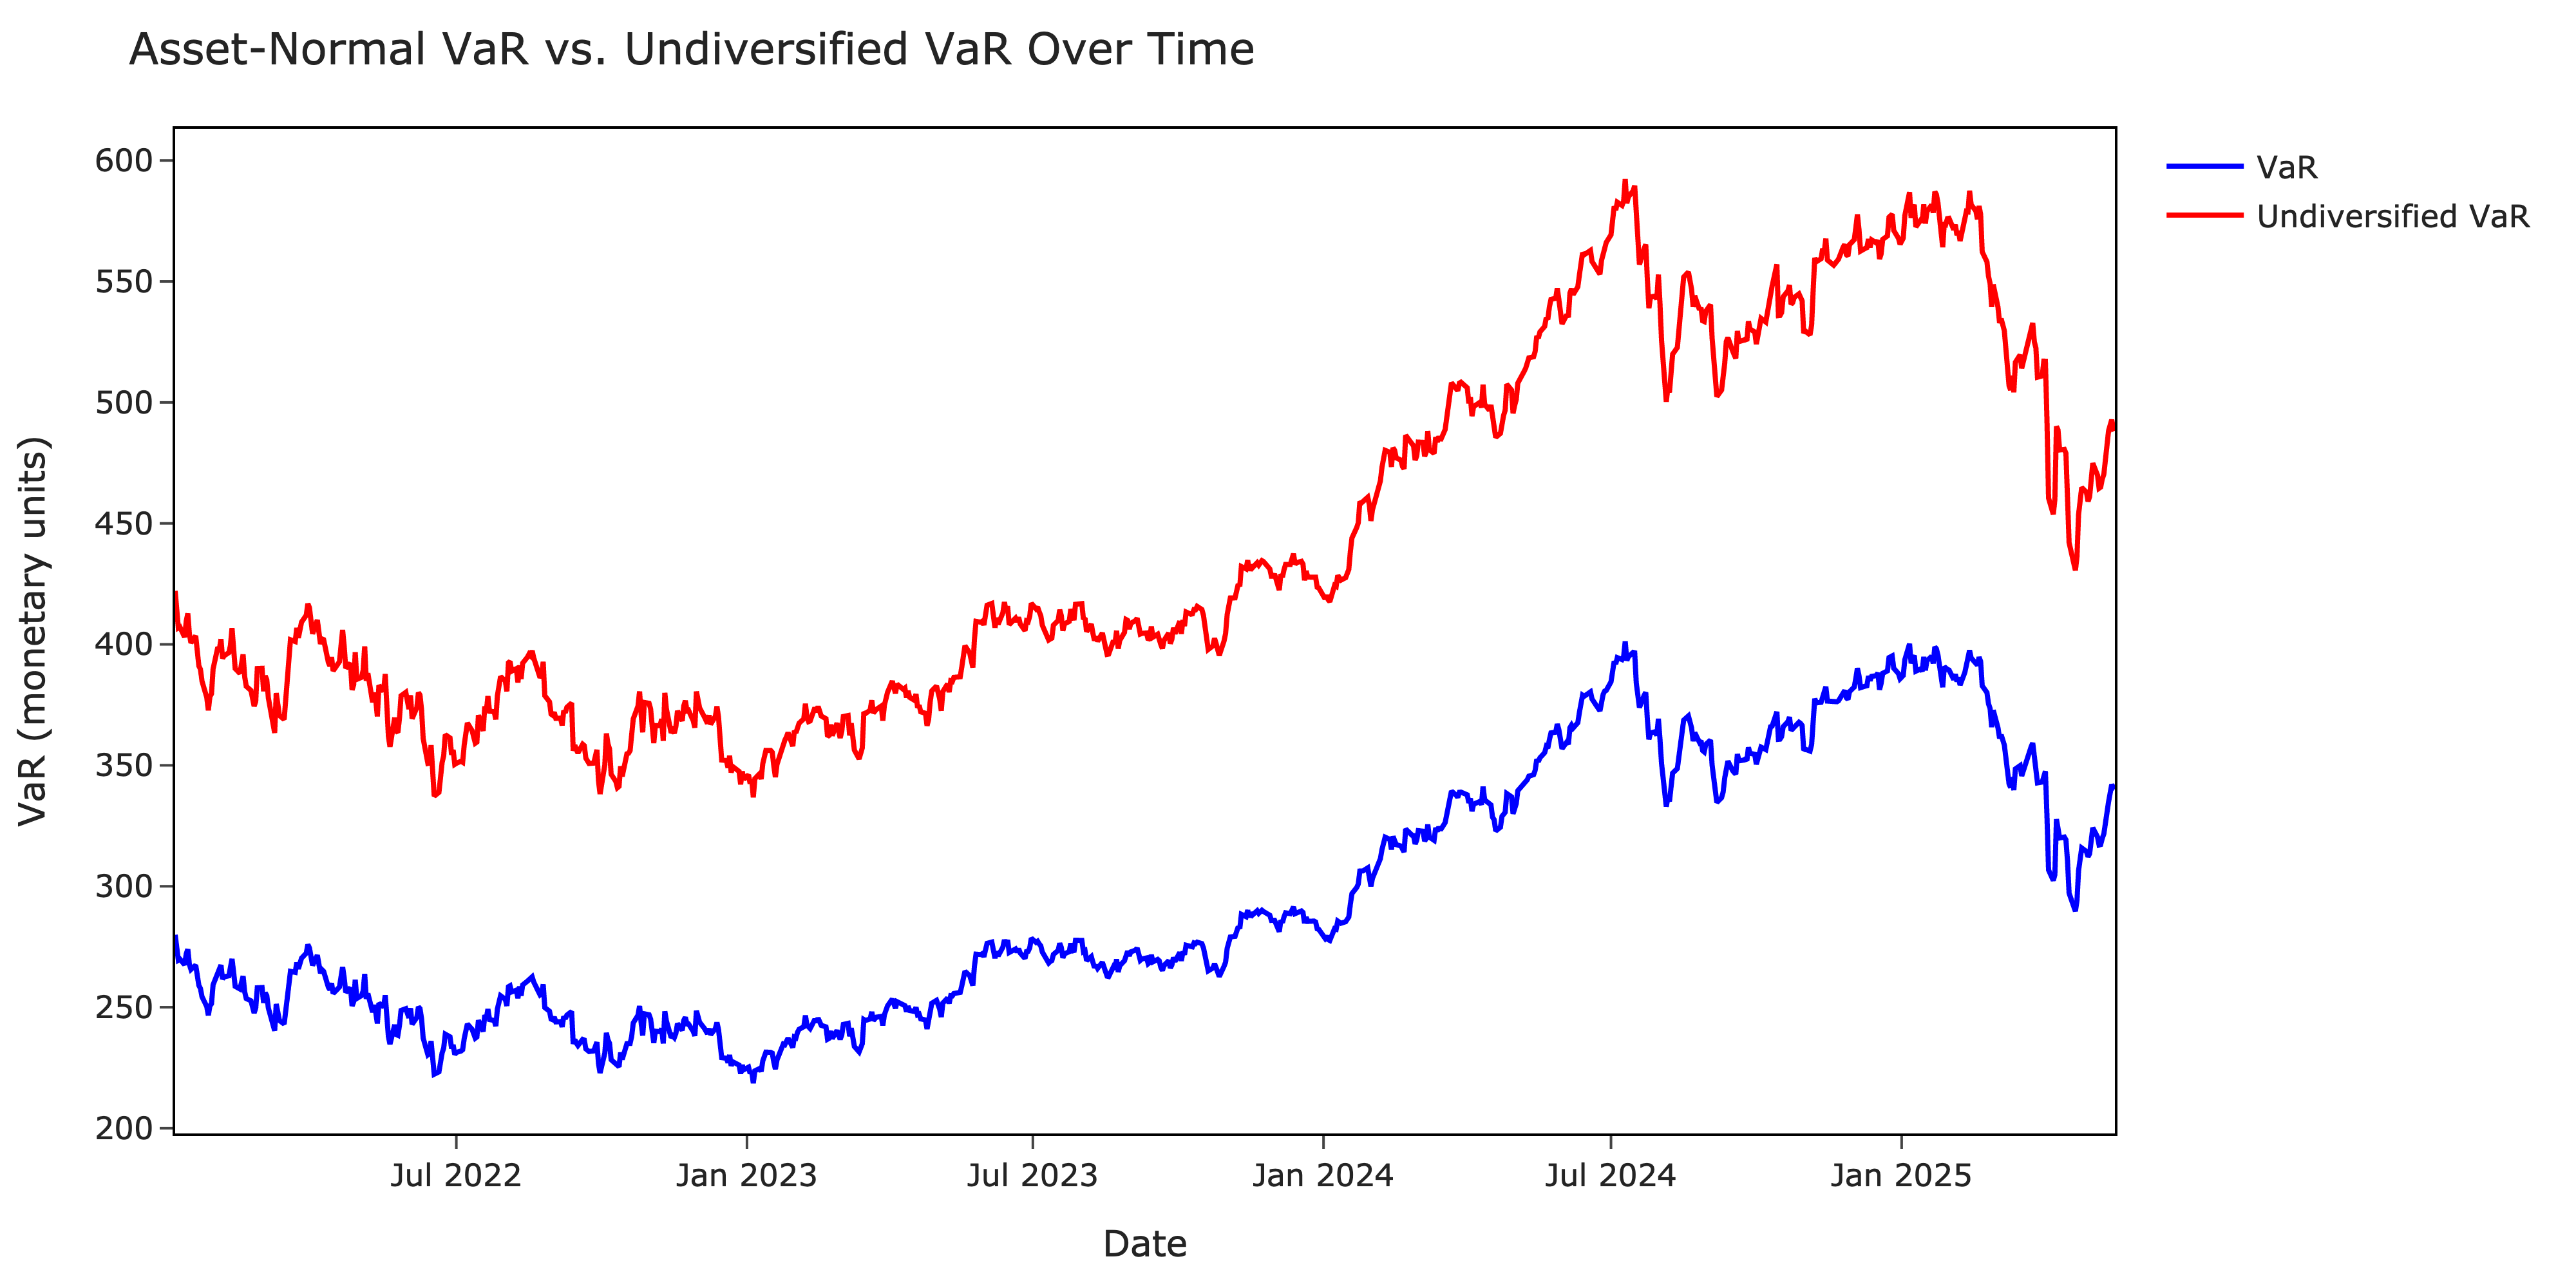

In [23]:
pl.plot_var_series(summary_df, interactive=False)


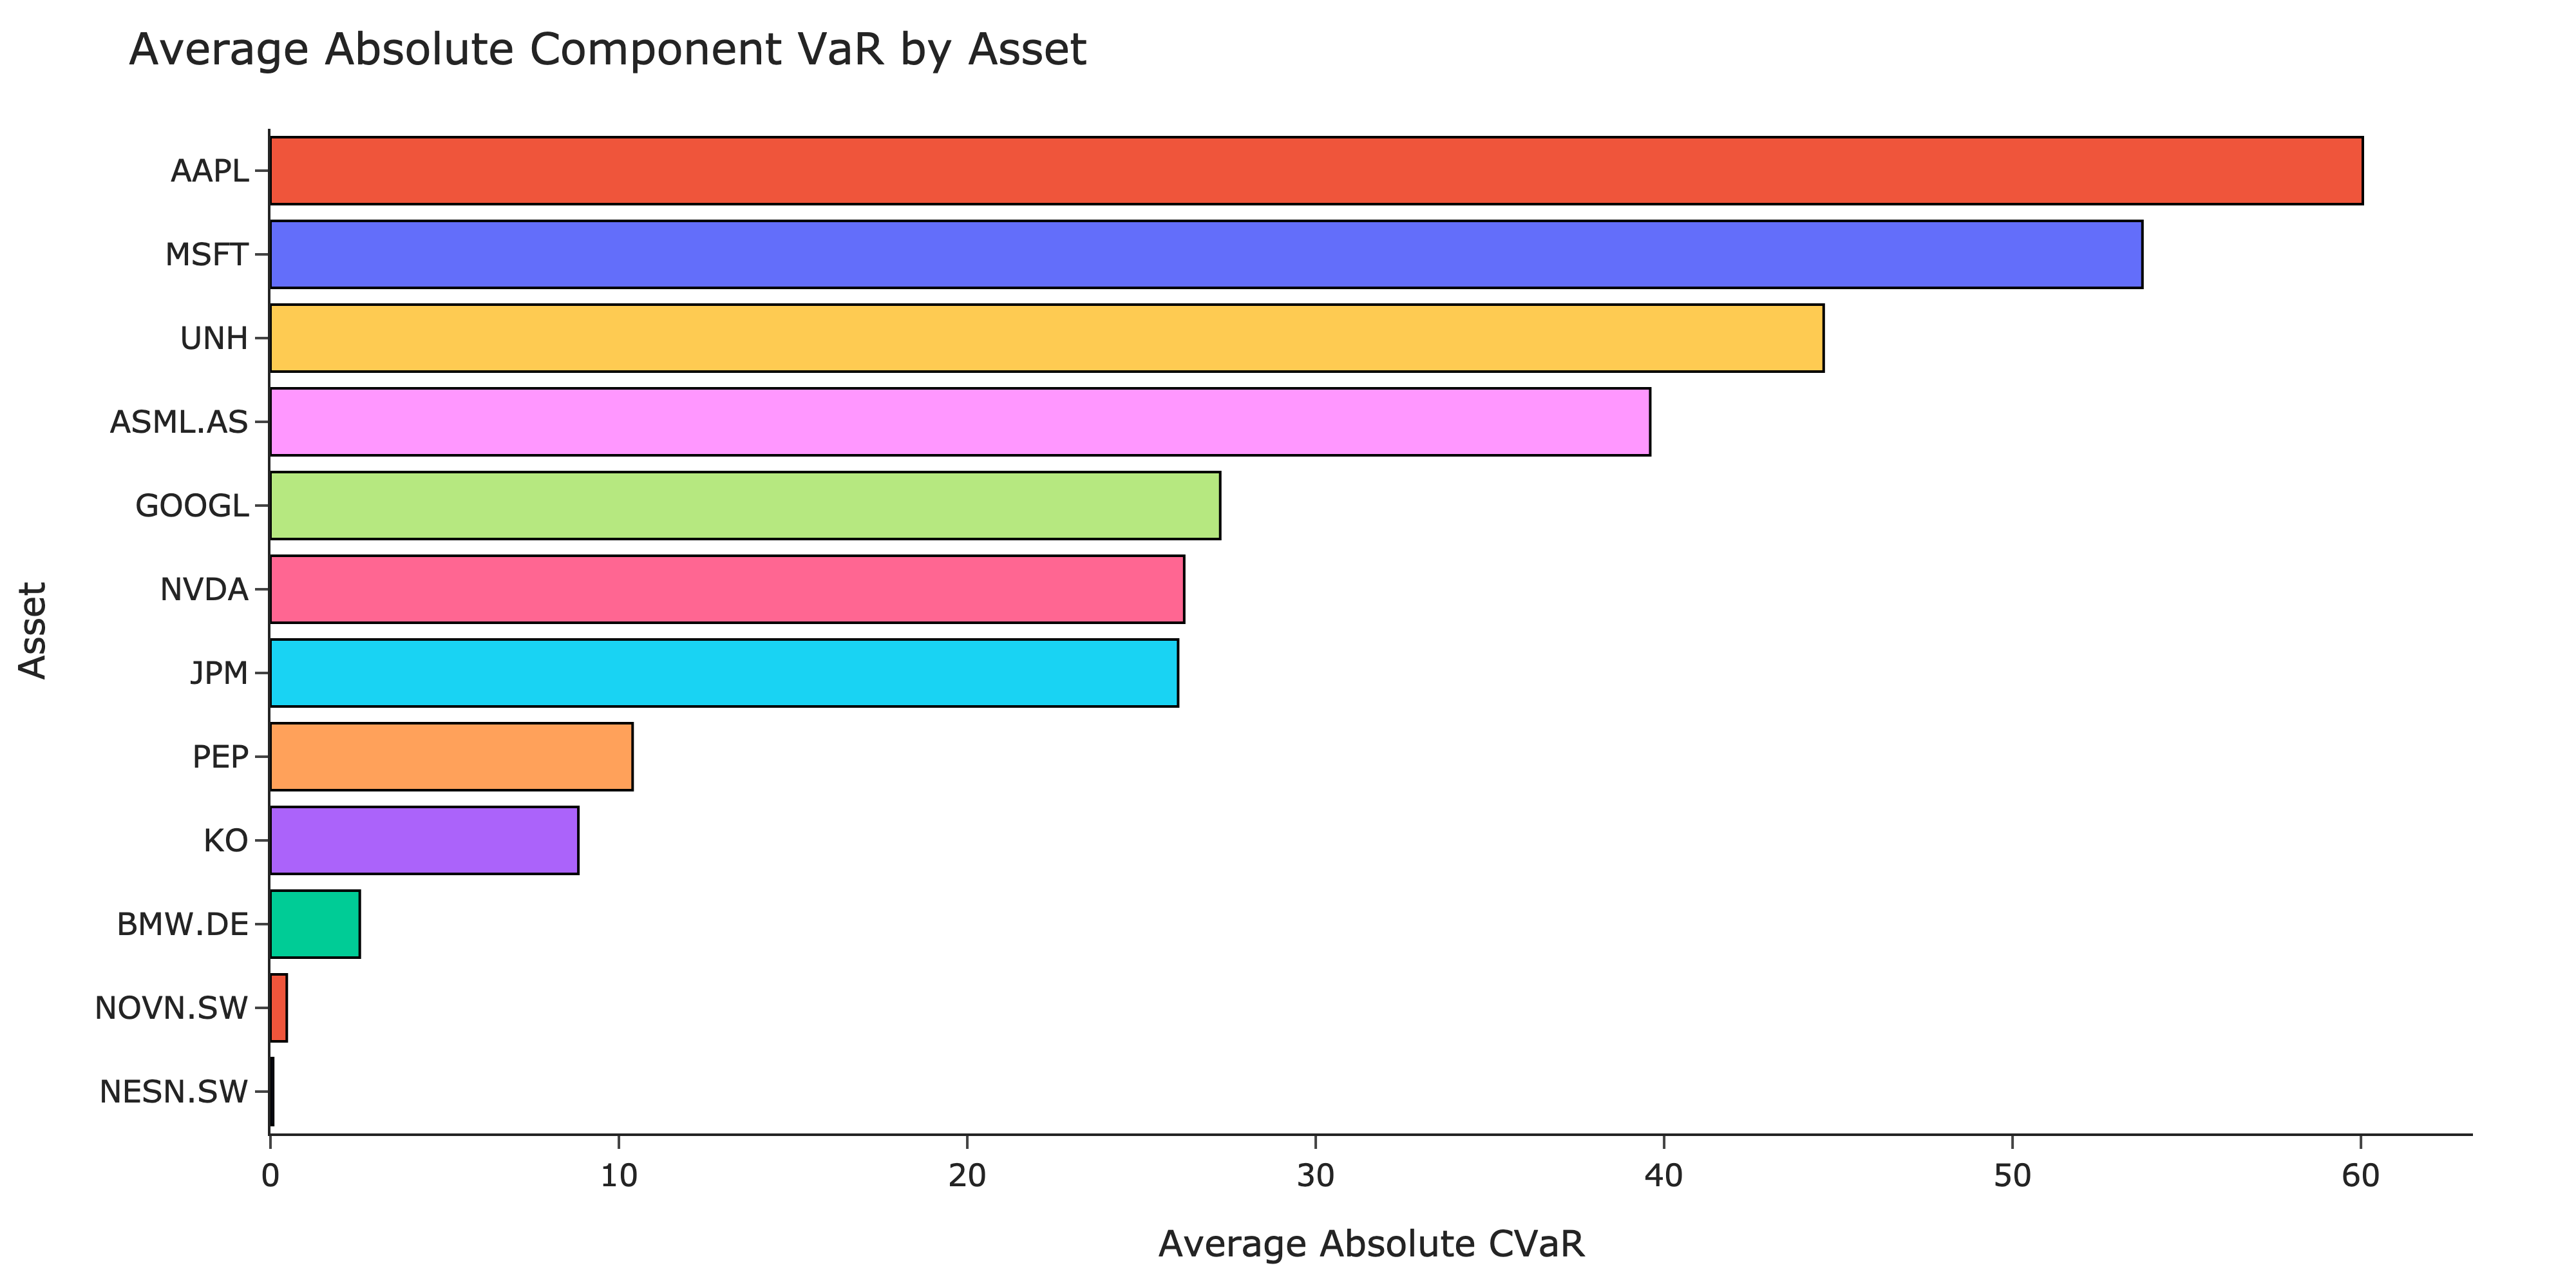

In [28]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


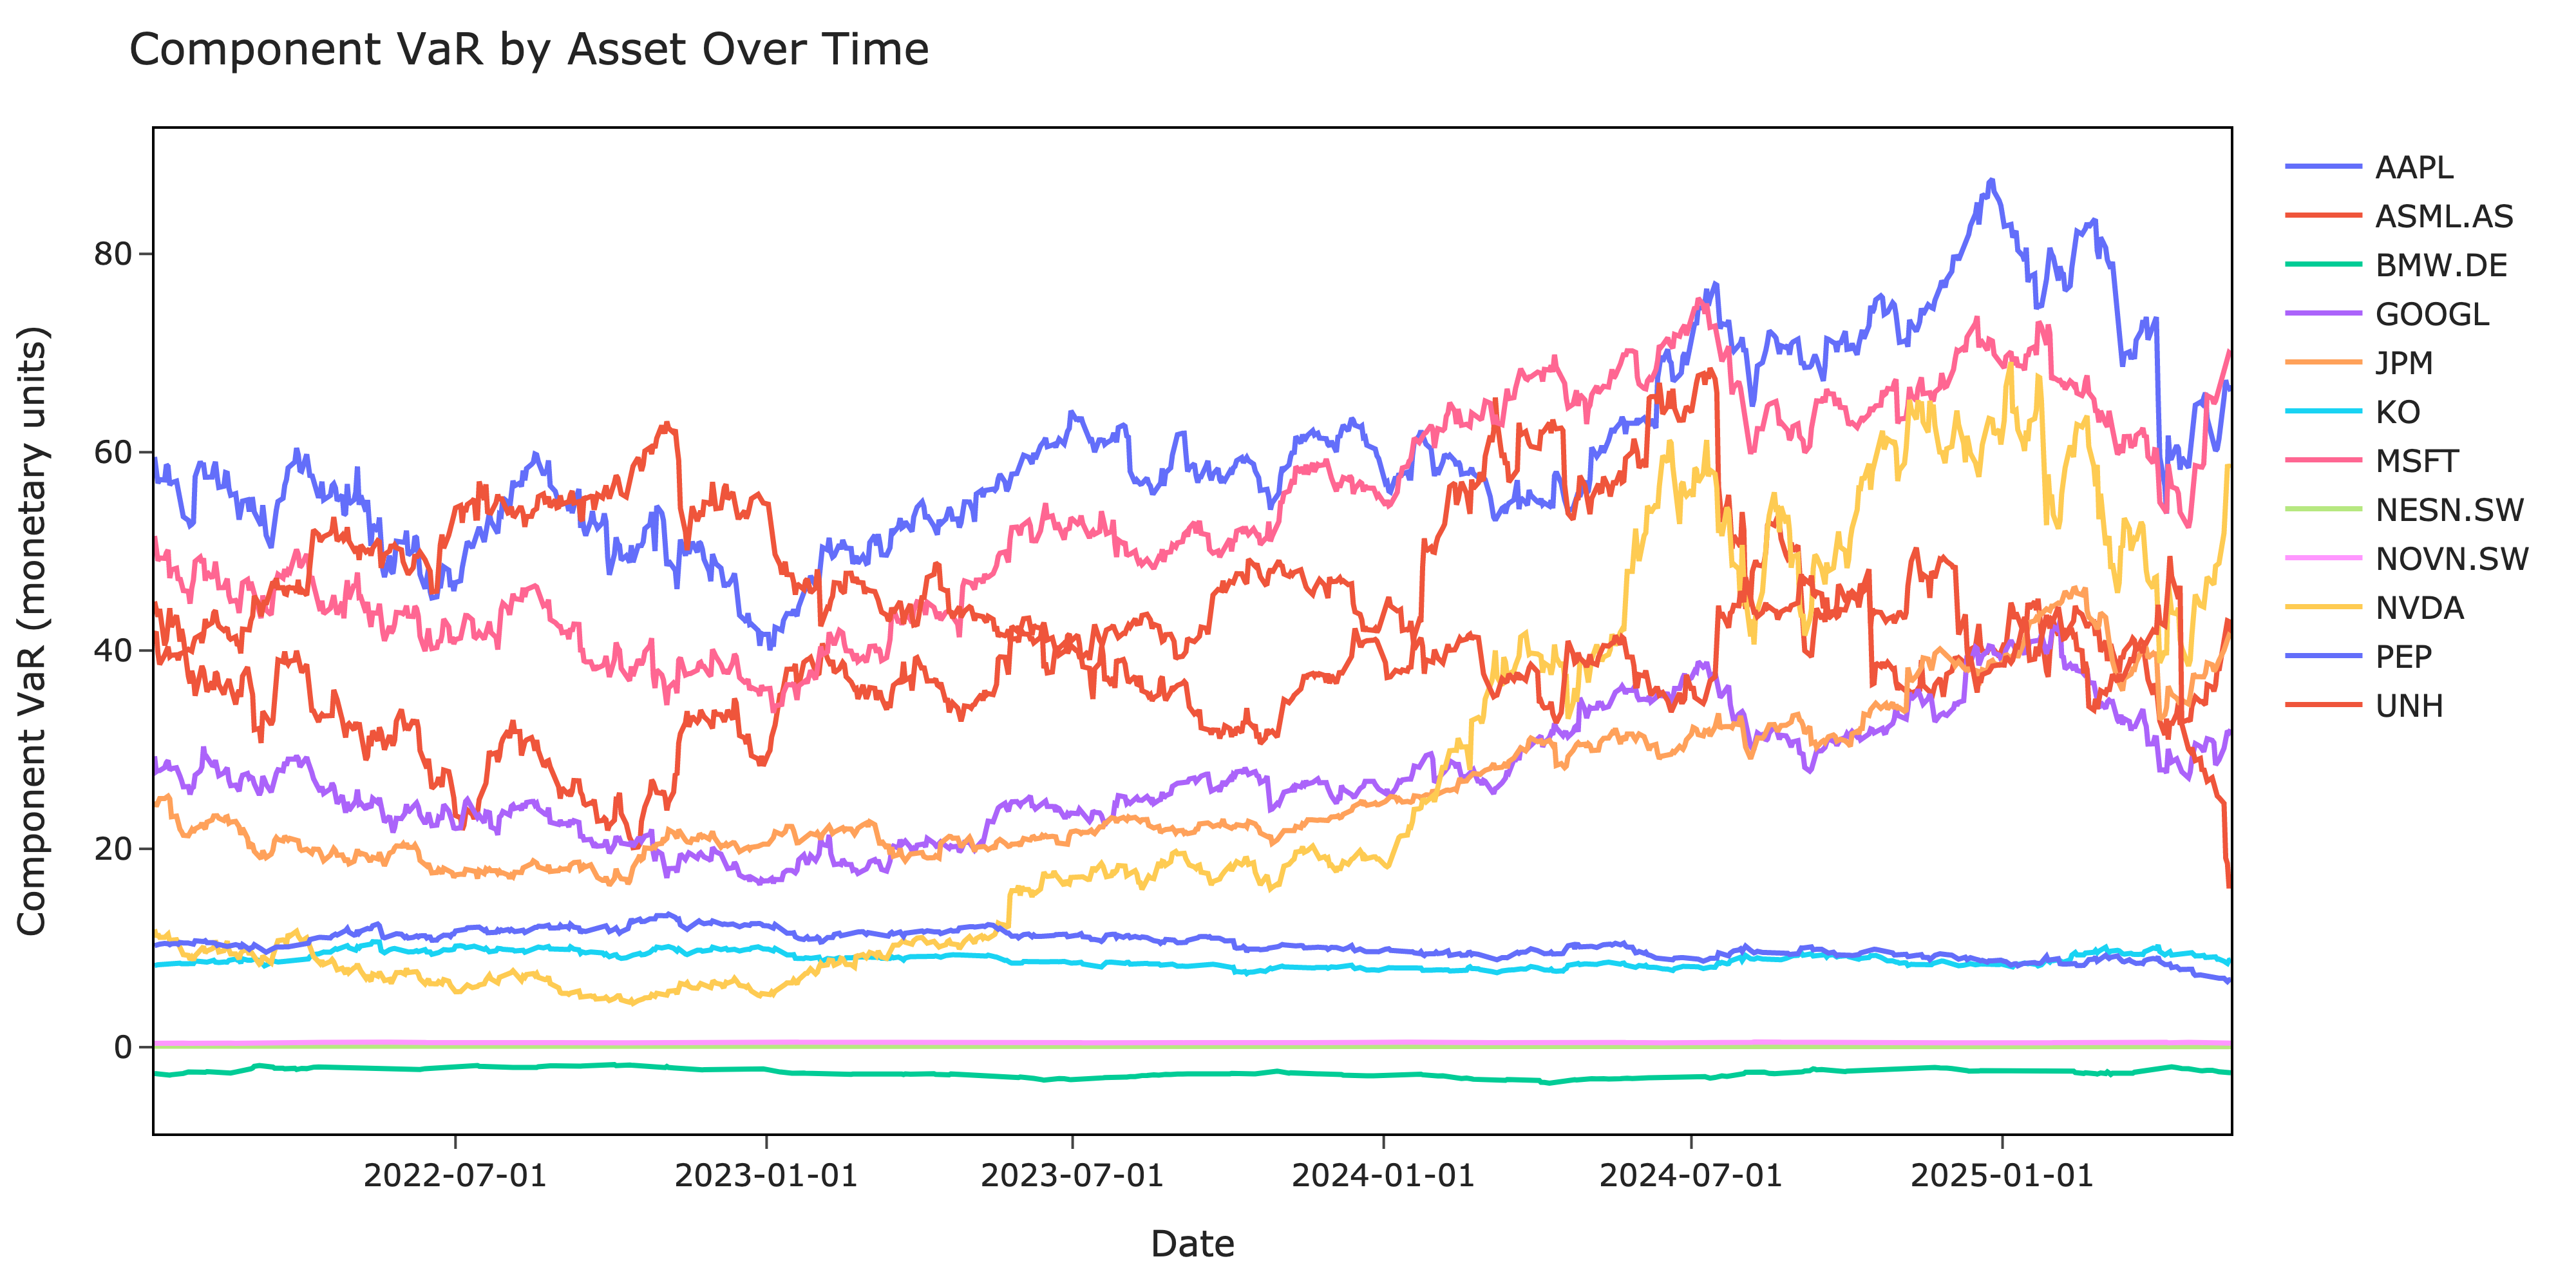

In [25]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


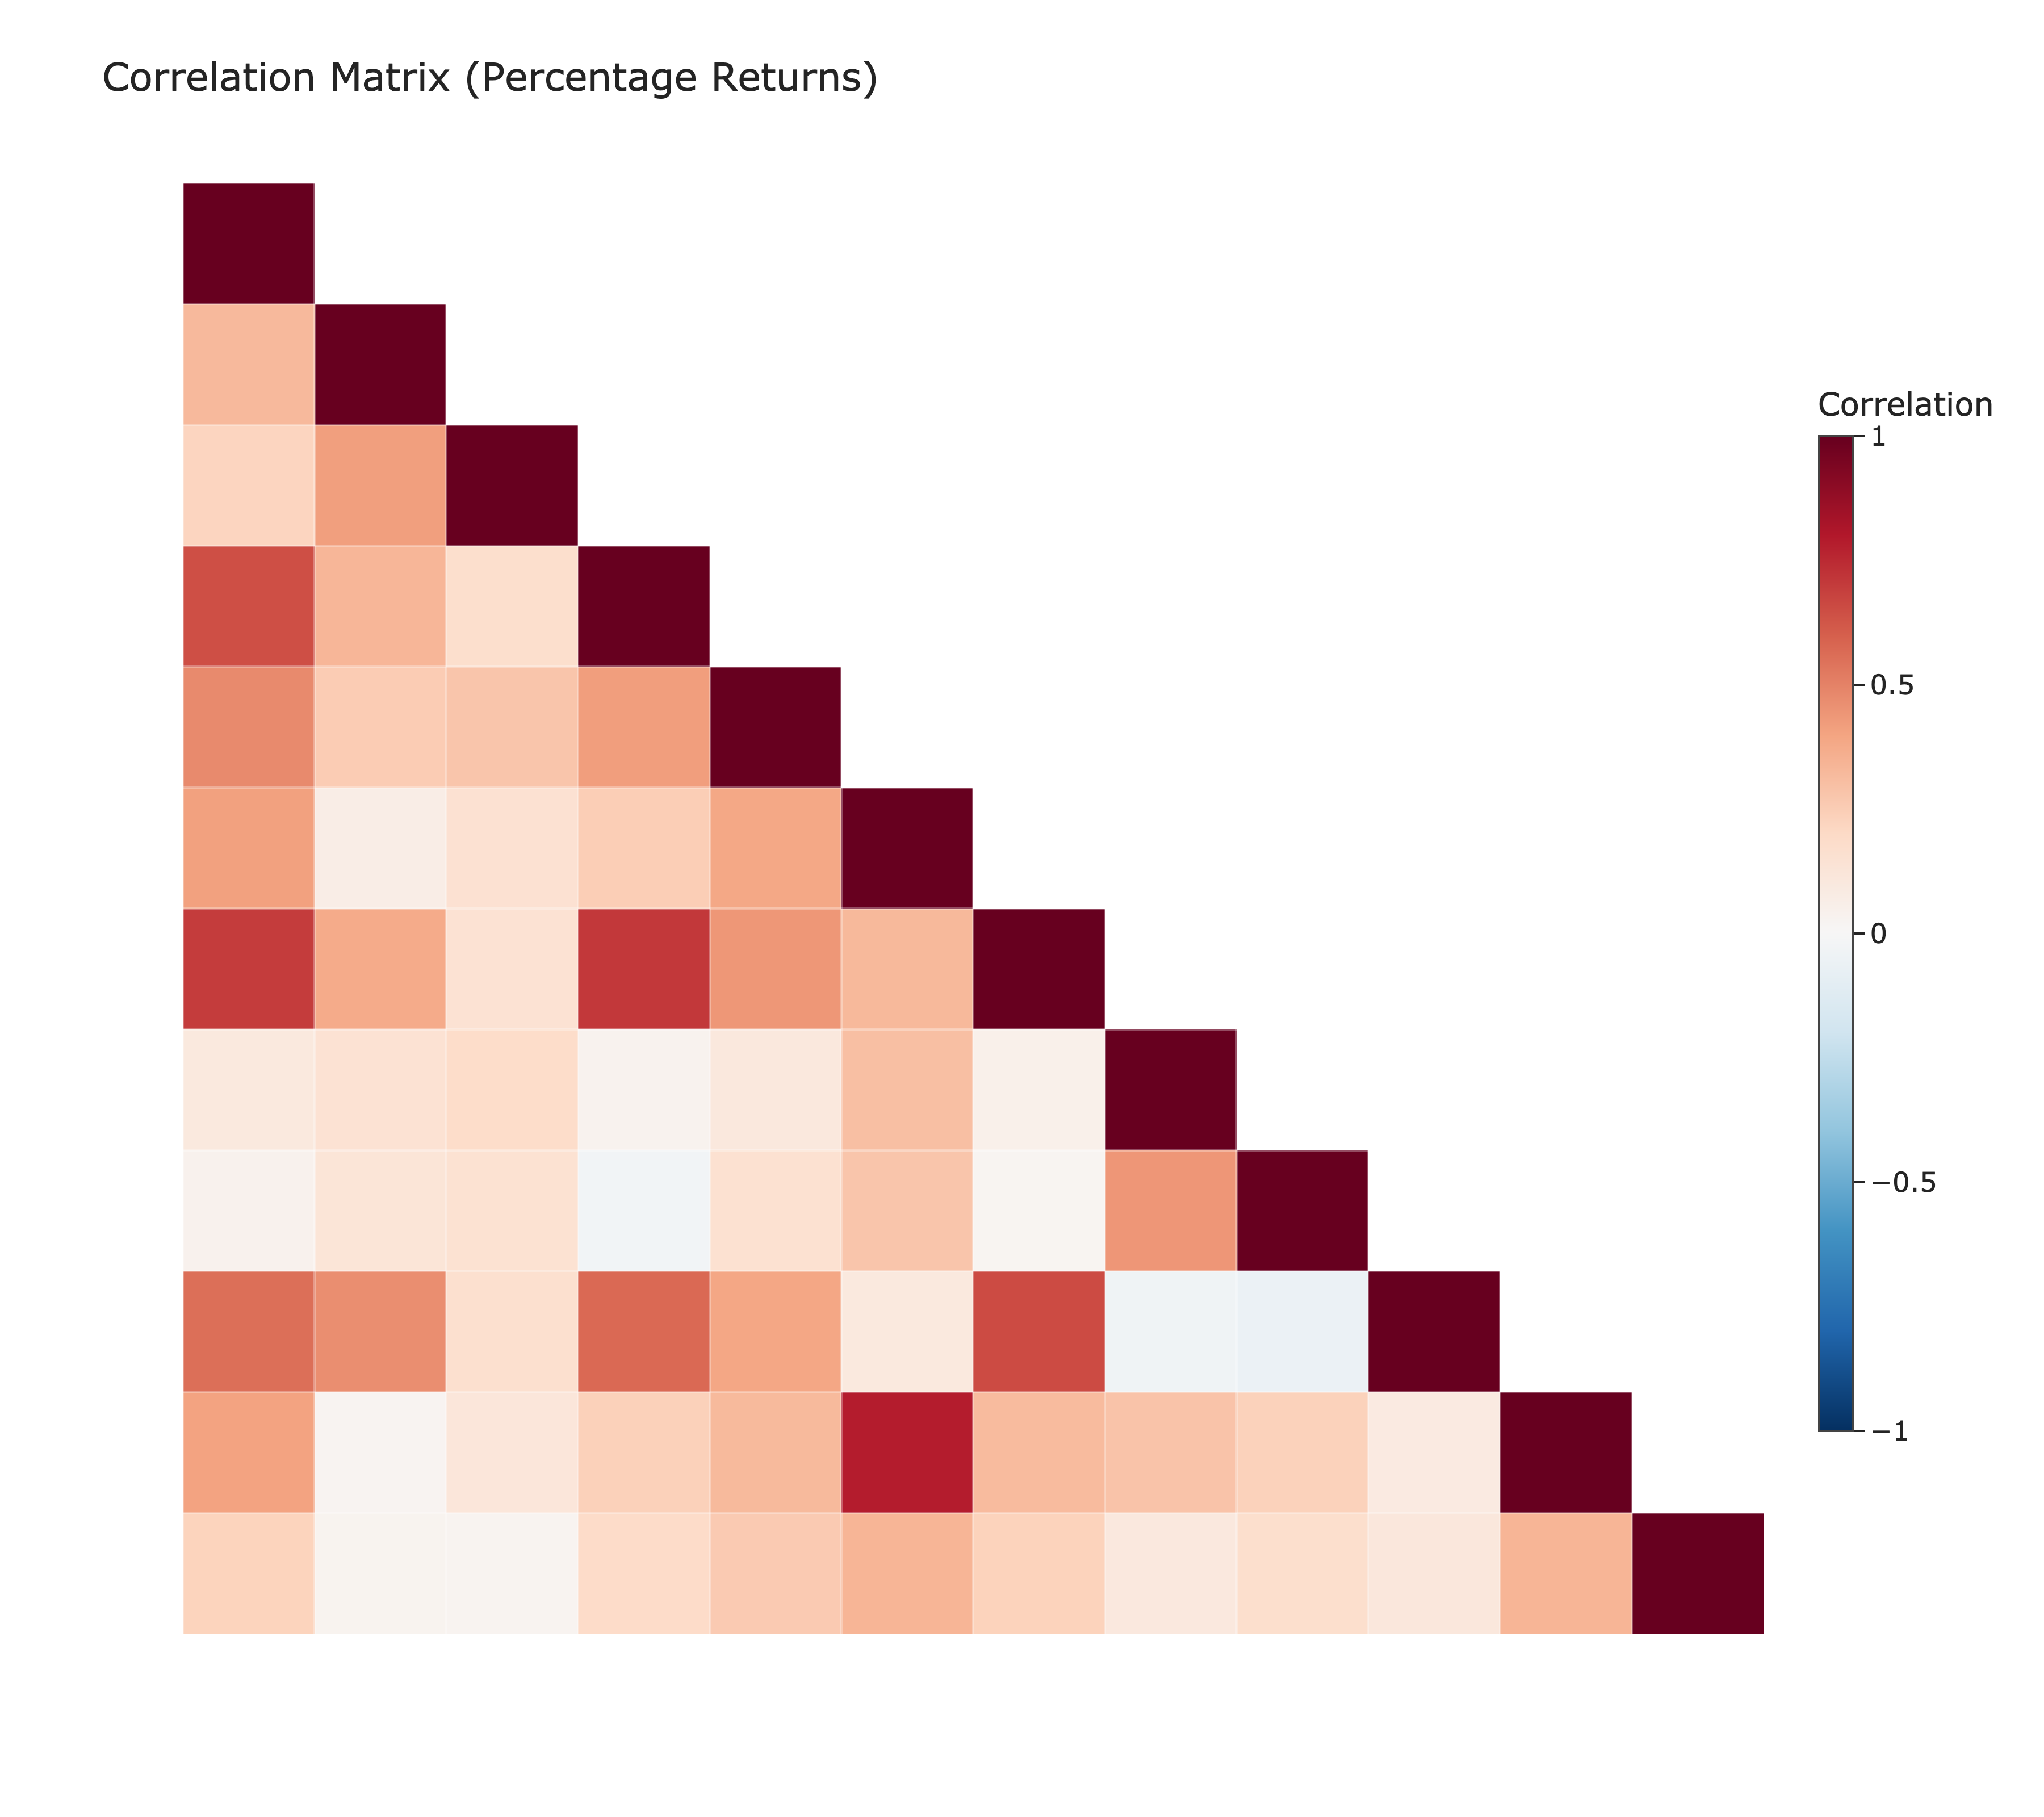

In [31]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.